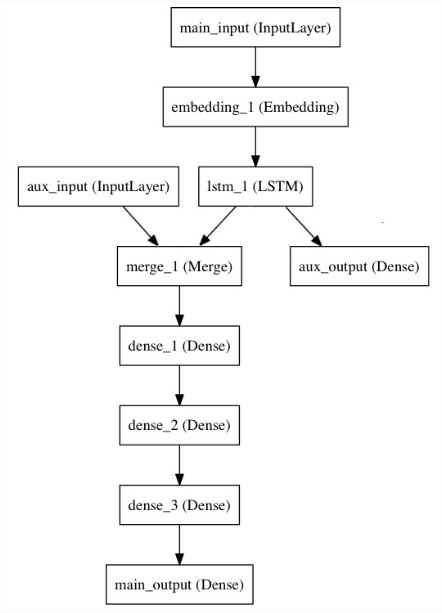

In [4]:

import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model

In [5]:
# Headline input: meant to receive sequences of 100 integers, between 1 and 10000.
# Note that we can name any layer by passing it a "name" argument.
main_input = Input(shape=(100,), dtype='int32', name='main_input')
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)
lstm_out = LSTM(32)(x)
#we feed into the model our auxiliary input data by concatenating it with the LSTM output:
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)


In [6]:
auxiliary_input = Input(shape=(5,), name='aux_input')
#this line can help concate2layer
x = keras.layers.concatenate([lstm_out, auxiliary_input])
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
main_output = Dense(1, activation='sigmoid', name='main_output')(x)


In [7]:
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])


In [8]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 512)     5120000     main_input[0][0]                 
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 32)           69760       embedding_1[0][0]                
__________________________________________________________________________________________________
aux_input (InputLayer)          (None, 5)            0                                            
__________________________________________________________________________________________________
concatenat

In [ ]:
#concatenate_1 simple join 2 layer like [l1,l1,1l]+[l2,l2] = [l1,l1,l1,l2,l2]

In [9]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              loss_weights=[1., 0.2])

In [ ]:
#this 
model.fit([headline_data, additional_data], [labels, labels],
          epochs=50, batch_size=32)

In [1]:
#for share layer

In [2]:
import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model

tweet_a = Input(shape=(280, 256))
tweet_b = Input(shape=(280, 256))

Using TensorFlow backend.


In [3]:
# This layer can take as input a matrix
# and will return a vector of size 64
shared_lstm = LSTM(64)

In [4]:
# When we reuse the same layer instance
# multiple times, the weights of the layer
# are also being reused
# (it is effectively *the same* layer)
encoded_a = shared_lstm(tweet_a)
encoded_b = shared_lstm(tweet_b)


In [5]:
merged_vector = keras.layers.concatenate([encoded_a, encoded_b], axis=-1)
predictions = Dense(1, activation='sigmoid')(merged_vector)


In [6]:
model = Model(inputs=[tweet_a, tweet_b], outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 280, 256)     0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 280, 256)     0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 64)           82176       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 128)          0           lstm_1[0][0]                     
          